In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import plotly
from plotly.offline import iplot
import cufflinks as cf

In [ ]:
plotly.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
df=pd.read_csv('/content/gdrive/My Drive/rainfall in india 1901-2015.csv')

In [ ]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [ ]:
df.shape

(4116, 19)

In [ ]:
df.dtypes

SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
Jan-Feb        float64
Mar-May        float64
Jun-Sep        float64
Oct-Dec        float64
dtype: object

In [ ]:
df.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [ ]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')

In [ ]:
df.drop(['ANNUAL', 'Jan-Feb', 'Mar-May','Jun-Sep', 'Oct-Dec'],axis=1,inplace=True)

In [ ]:
months=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
subyear=['SUBDIVISION', 'YEAR']

In [ ]:
df_subyear=df[subyear]

In [ ]:
df_months=df[months].apply(lambda row: row.fillna(row.mean()), axis=1)

In [ ]:
df_months

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6
1,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5
2,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0
3,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1
4,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7
...,...,...,...,...,...,...,...,...,...,...,...,...
4111,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9
4112,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8
4113,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7
4114,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3


In [ ]:
df_subyear.shape

(4116, 2)

In [ ]:
df_months.shape

(4116, 12)

In [ ]:
df=[df_subyear,df_months]

In [ ]:
df=pd.DataFrame(pd.concat(df,axis=1))

In [ ]:
df.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
dtype: int64

In [ ]:
df['JAN-FEB']=df['JAN']+df['FEB']
df['MAR-MAY']=df['MAR']+df['MAY']+df['APR']
df['JUN-SEP']=df['JUN']+df['JUL']+df['AUG']+df['SEP']
df['OCT-DEC']=df['OCT']+df['NOV']+df['DEC']
df['ANNUAL']=df['JAN-FEB']+df['MAR-MAY']+df['JUN-SEP']+df['OCT-DEC']

In [ ]:
df.head(5)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC,ANNUAL
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,136.3,560.3,1696.3,980.3,3373.2
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,159.8,458.3,2185.9,716.7,3520.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,156.7,236.1,1874.0,690.6,2957.4
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,24.1,506.9,1977.6,571.0,3079.6
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,1.3,309.7,1624.9,630.8,2566.7


#LETS Visualize

YearWise Rainfall

In [ ]:
year_wise_rainfall=df.groupby(['YEAR']).sum()['ANNUAL']
g=year_wise_rainfall.iplot(kind='bar',title='Rainfall According To Year',xTitle='Years',yTitle='Rainfall in mm')

#Region Wise

In [ ]:
regionwise_rainfall=df.groupby(['SUBDIVISION']).sum()['ANNUAL']
regionwise_rainfall.iplot(kind='bar',title='Rainfall According To Regions',xTitle='Regions',yTitle='Rainfall in mm')

In [ ]:
year_wise_quaterly=df.groupby(['YEAR']).sum()[['JAN-FEB', 'MAR-MAY', 'JUN-SEP','OCT-DEC']]
year_wise_quaterly_2015=year_wise_quaterly[year_wise_quaterly.index==2015]
year_wise_quaterly_2015.values.reshape(4)

array([ 1291.6,  7325.3, 32508.1,  4975.5])

#How Monsoon affects us 

In [ ]:
import plotly.express as px
px.pie(values=year_wise_quaterly_2015.values.reshape(4),names=year_wise_quaterly_2015.columns,title='Quaterly Rain fall')

Text(0.5, 1.0, 'Rainfall in Subdivisions of India')

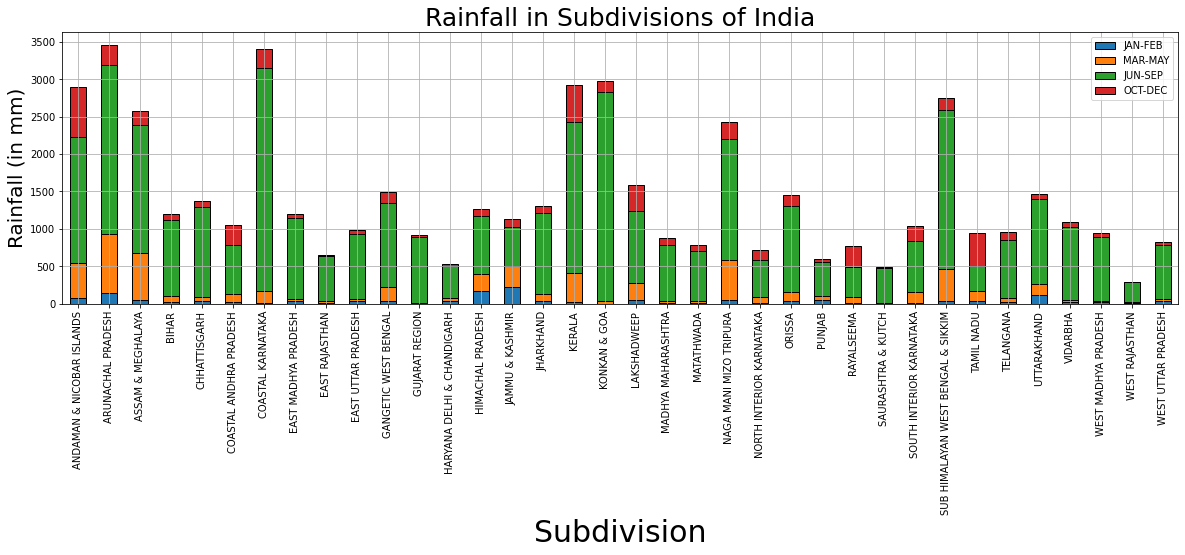

In [ ]:
region_quaterly=df[['SUBDIVISION','JAN-FEB', 'MAR-MAY', 'JUN-SEP','OCT-DEC']].groupby(['SUBDIVISION']).mean()
region_quaterly.plot.bar(stacked=True,figsize=(20,5),edgecolor='k',width=0.5,grid=True)
plt.xlabel('Subdivision',fontsize=30)
plt.ylabel('Rainfall (in mm)',fontsize=20)
plt.title('Rainfall in Subdivisions of India',fontsize=25)

Text(0.5, 1.0, 'Seasonal Rainfall from Year 1901 to 2015')

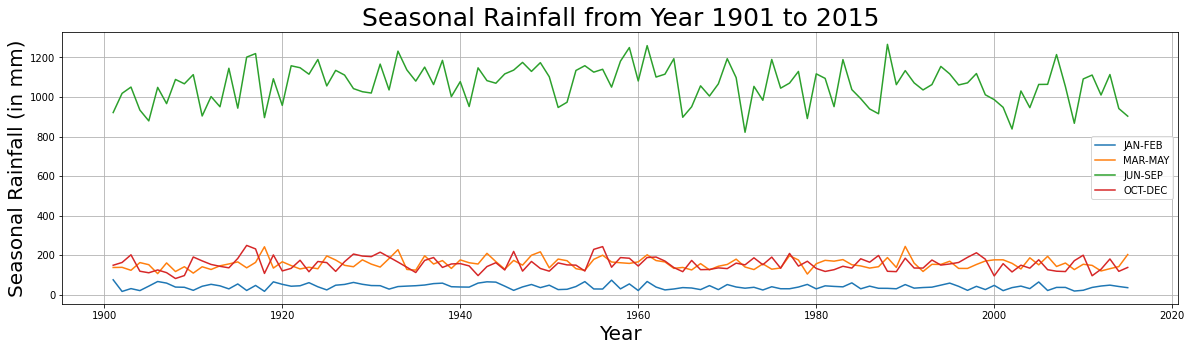

In [ ]:
year_quaterly=df[['YEAR','JAN-FEB', 'MAR-MAY', 'JUN-SEP','OCT-DEC']].groupby(['YEAR']).mean()
year_quaterly.plot.line(figsize=(20,5),grid=True)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Seasonal Rainfall (in mm)',fontsize=20)
plt.title('Seasonal Rainfall from Year 1901 to 2015',fontsize=25)

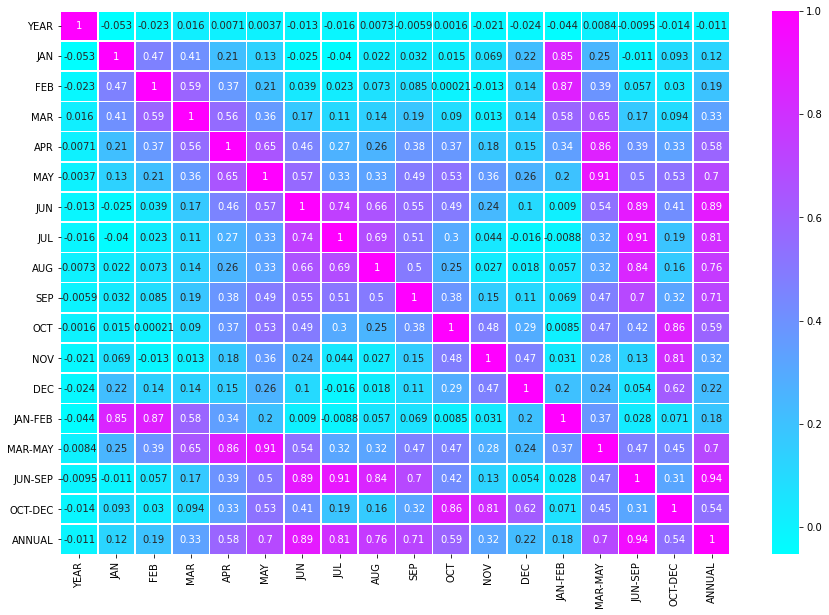

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='cool',linewidths=0.5,annot=True)

Text(0.5, 1.0, 'Monthly Rainfall in India')

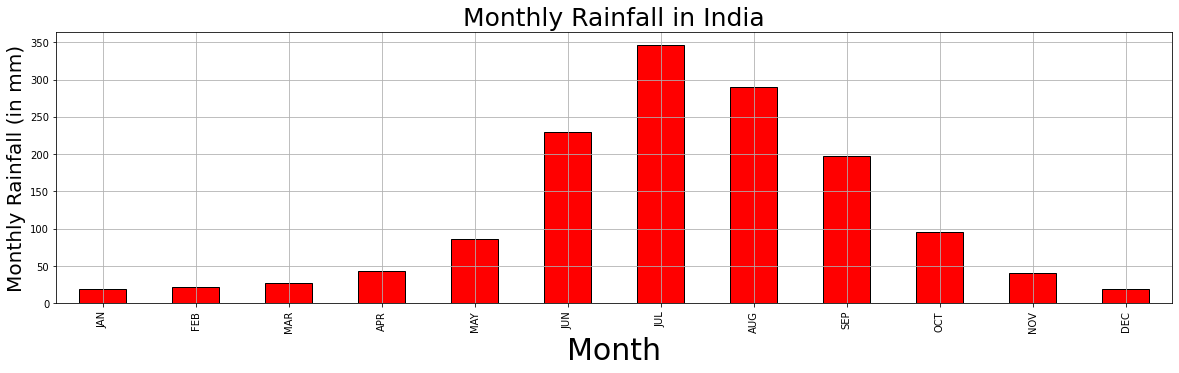

In [ ]:
df[['JAN','FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']].mean().plot.bar(figsize=(20,5),edgecolor='k',width=0.5,grid=True,color='red')
plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall (in mm)',fontsize=20)
plt.title('Monthly Rainfall in India',fontsize=25)

In [ ]:
df['SUBDIVISION'].unique()

array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

In [ ]:
karnataka=df[(df['SUBDIVISION']=='COASTAL KARNATAKA')|(df['SUBDIVISION']=='NORTH INTERIOR KARNATAKA')|(df['SUBDIVISION']=='SOUTH INTERIOR KARNATAKA')]
karnataka.index=karnataka.SUBDIVISION
karnataka=karnataka.drop(['SUBDIVISION'],axis=1)
karnataka

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC,ANNUAL
SUBDIVISION,,,,,,,,,,,,,,,,,,
COASTAL KARNATAKA,1901,1.8,0.6,10.7,52.4,81.6,960.9,991.2,606.4,108.0,120.5,104.9,17.8,2.4,144.7,2666.5,243.2,3056.8
COASTAL KARNATAKA,1902,3.2,0.3,4.9,10.2,54.6,698.4,1401.6,454.2,708.4,180.4,50.8,132.2,3.5,69.7,3262.6,363.4,3699.2
COASTAL KARNATAKA,1903,0.7,0.0,0.0,4.1,202.8,536.5,1405.5,593.8,304.4,185.0,79.3,5.3,0.7,206.9,2840.2,269.6,3317.4
COASTAL KARNATAKA,1904,2.4,0.0,4.8,23.7,93.2,1108.2,1070.0,465.6,245.3,127.2,0.7,0.0,2.4,121.7,2889.1,127.9,3141.1
COASTAL KARNATAKA,1905,0.0,0.2,0.0,6.4,83.1,767.3,777.3,586.9,172.9,222.2,36.1,0.0,0.2,89.5,2304.4,258.3,2652.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SOUTH INTERIOR KARNATAKA,2011,2.1,12.4,12.4,80.2,83.5,177.1,202.4,199.5,111.2,144.8,56.7,5.0,14.5,176.1,690.2,206.5,1087.3
SOUTH INTERIOR KARNATAKA,2012,4.6,5.5,8.1,99.0,45.6,81.8,144.7,236.5,100.6,62.8,82.6,6.2,10.1,152.7,563.6,151.6,878.0
SOUTH INTERIOR KARNATAKA,2013,0.5,10.1,11.7,34.6,95.6,176.2,307.4,151.7,191.8,103.7,24.9,2.4,10.6,141.9,827.1,131.0,1110.6


In [ ]:
karnataka.index.unique()

Index(['COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA'],
      dtype='object', name='SUBDIVISION')

In [ ]:
for reg in karnataka.index.unique():
  temp=karnataka[karnataka.index==reg]
  temp=temp.groupby(['YEAR']).mean()['ANNUAL']
  temp.iplot(kind='line',title="{}".format(reg))

In [ ]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP',
       'OCT-DEC', 'ANNUAL'],
      dtype='object')

#Districts

In [ ]:
district=pd.read_csv('/content/gdrive/My Drive/district wise rainfall normal.csv')

In [ ]:
district.head(5)

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [ ]:
district.groupby(['DISTRICT']).sum()['ANNUAL'].sort_values(ascending=True).head(10).iplot(kind='bar',title='Districts with Lowest Rainfalls',
                                                                                          xTitle='Districts',yTitle='Rainfall(in mm)')

In [ ]:
district.groupby(['DISTRICT']).sum()['ANNUAL'].sort_values(ascending=False).head(10).iplot(kind='bar',title='Districts with Highest Rainfalls',
                                                                                          xTitle='Districts',yTitle='Rainfall(in mm)')

In [ ]:
district.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [ ]:
states=district['STATE_UT_NAME'].unique()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



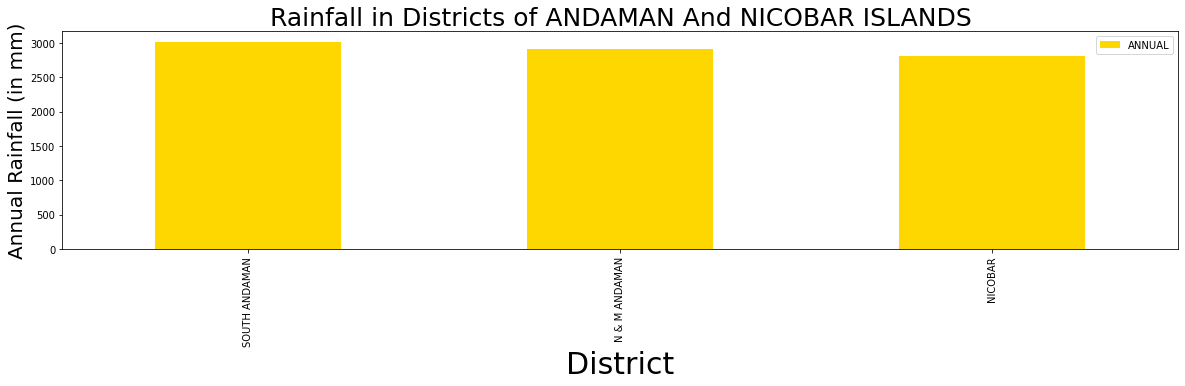

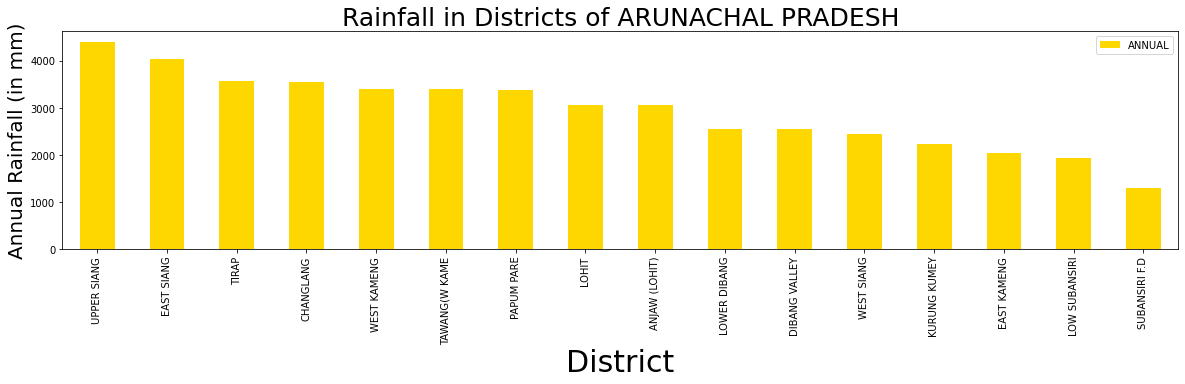

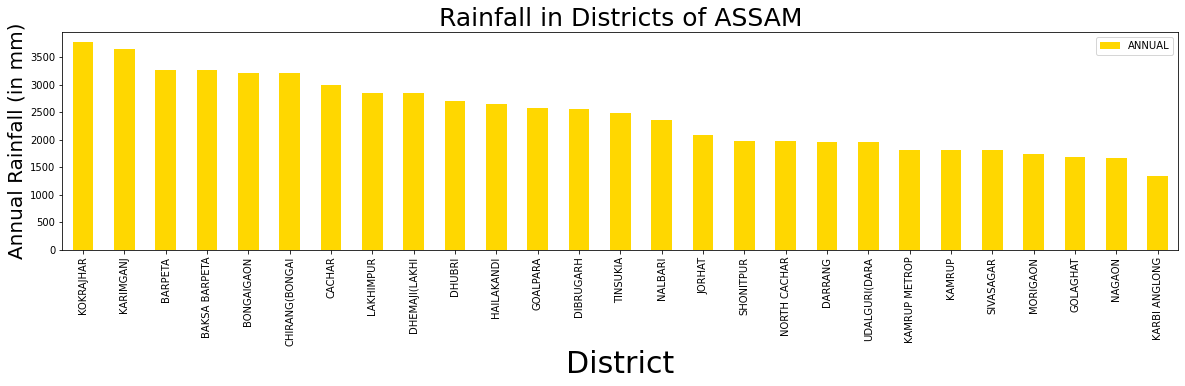

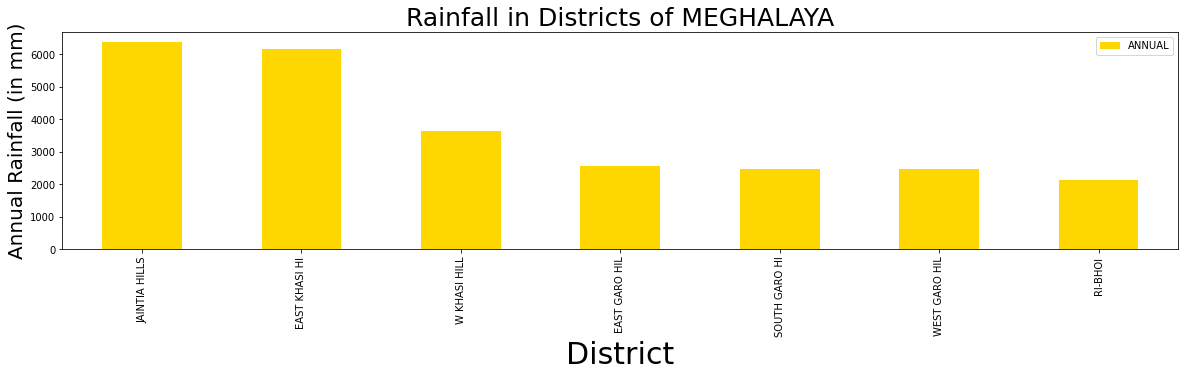

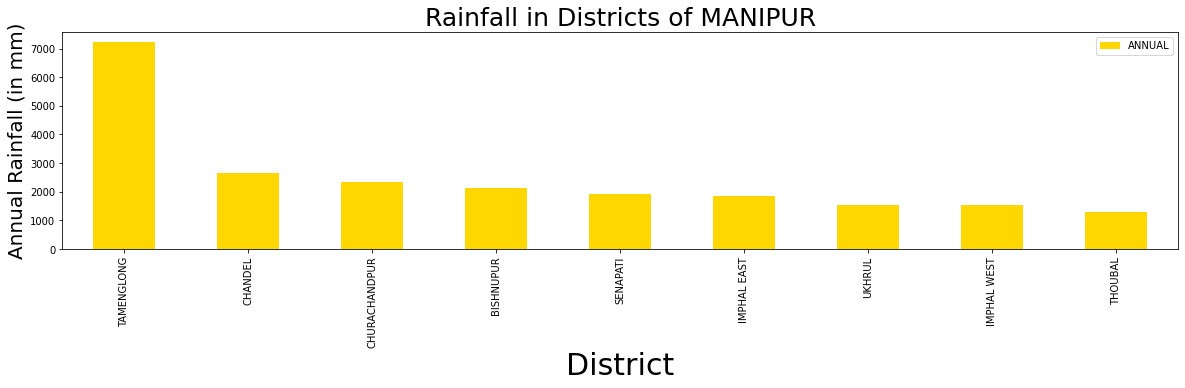

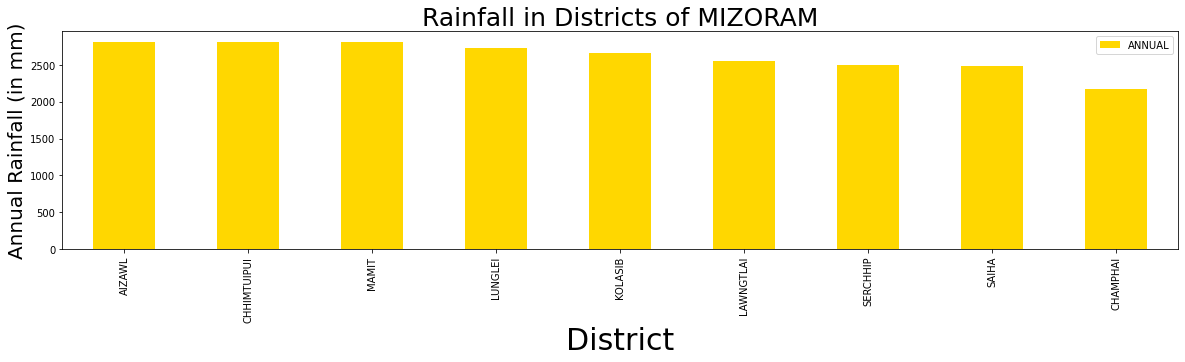

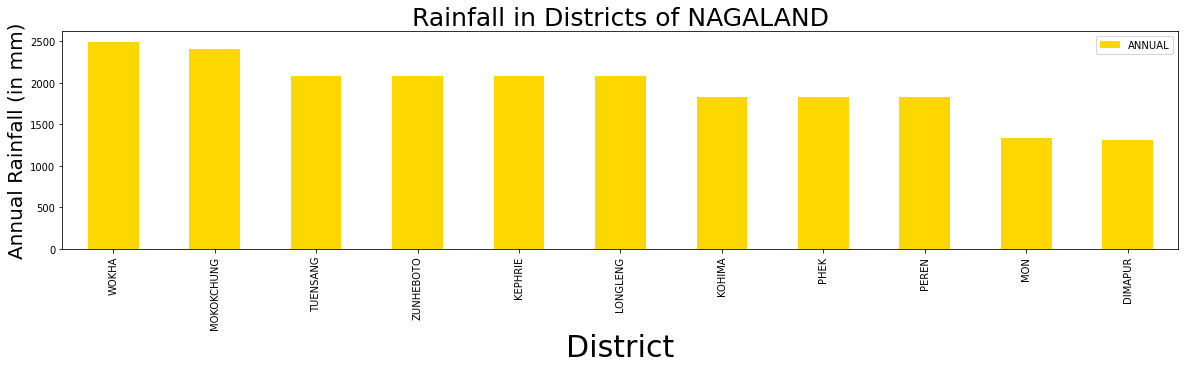

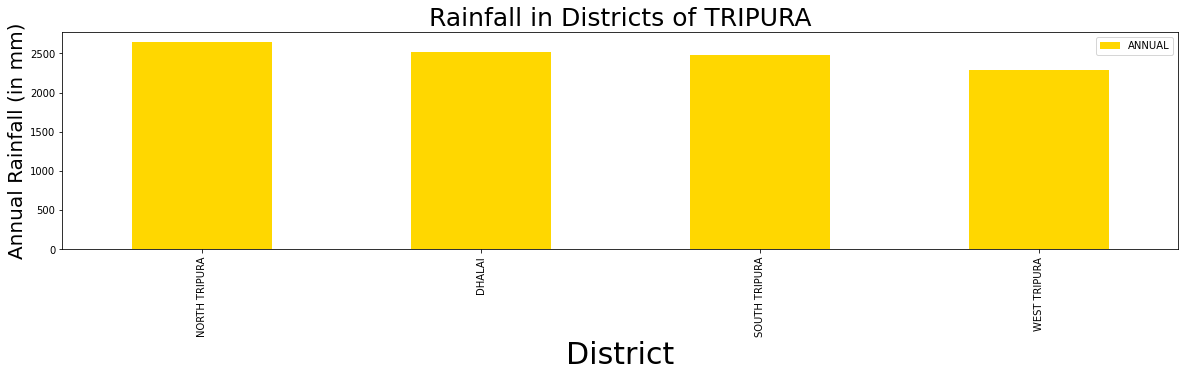

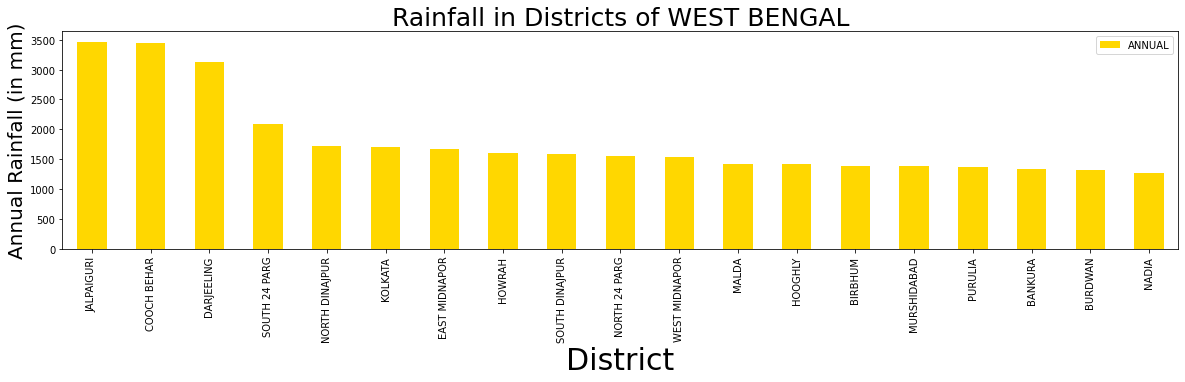

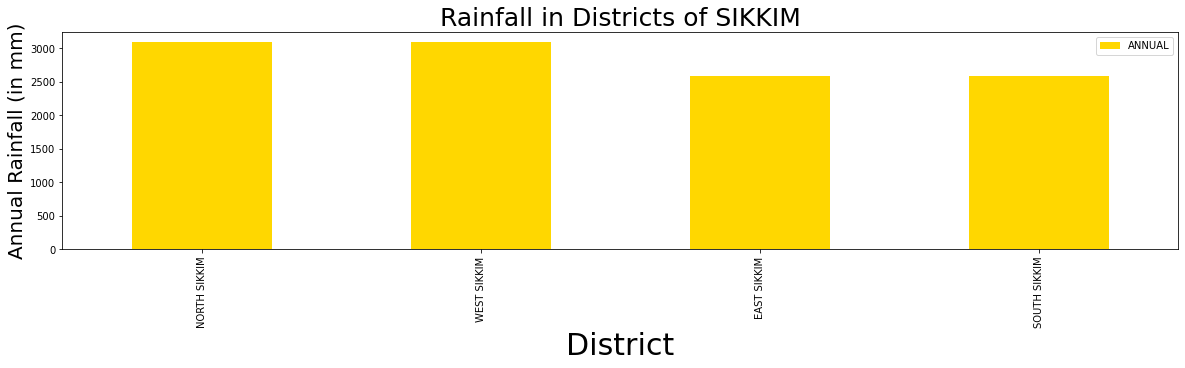

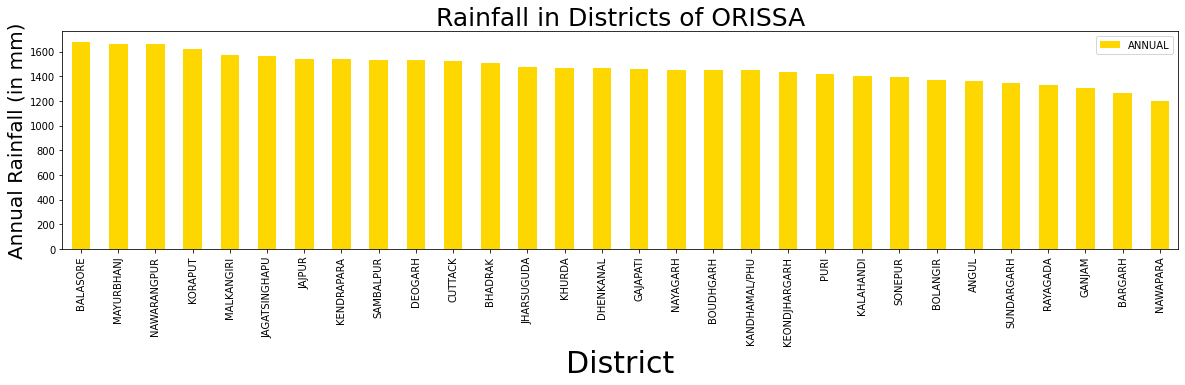

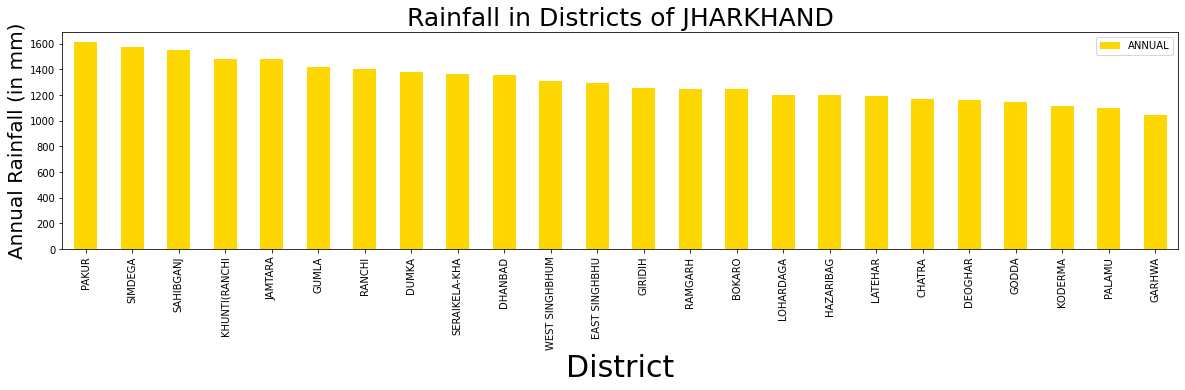

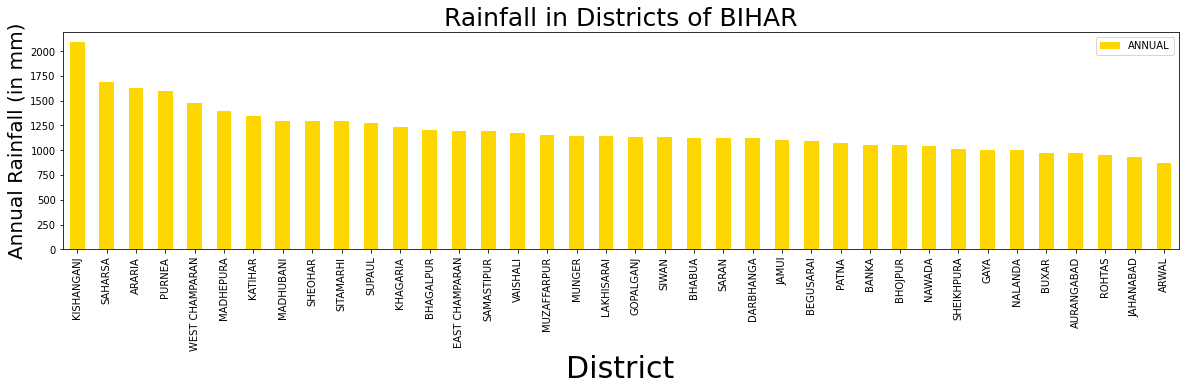

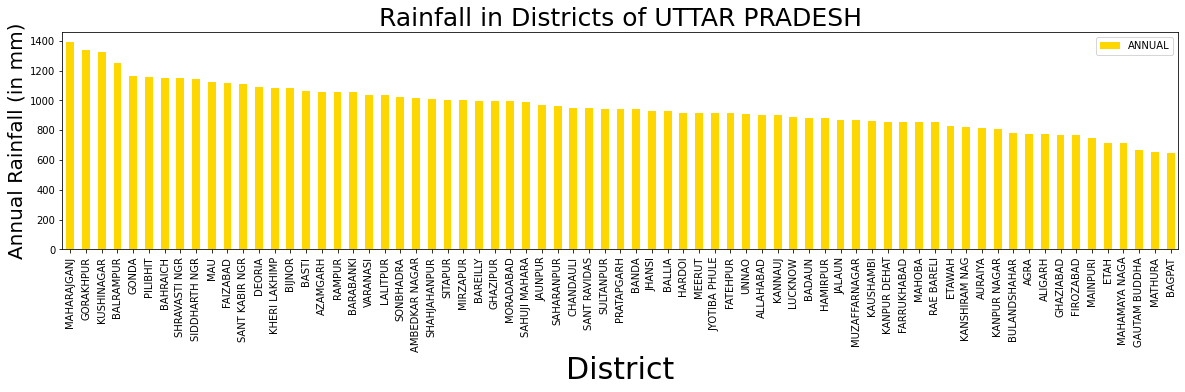

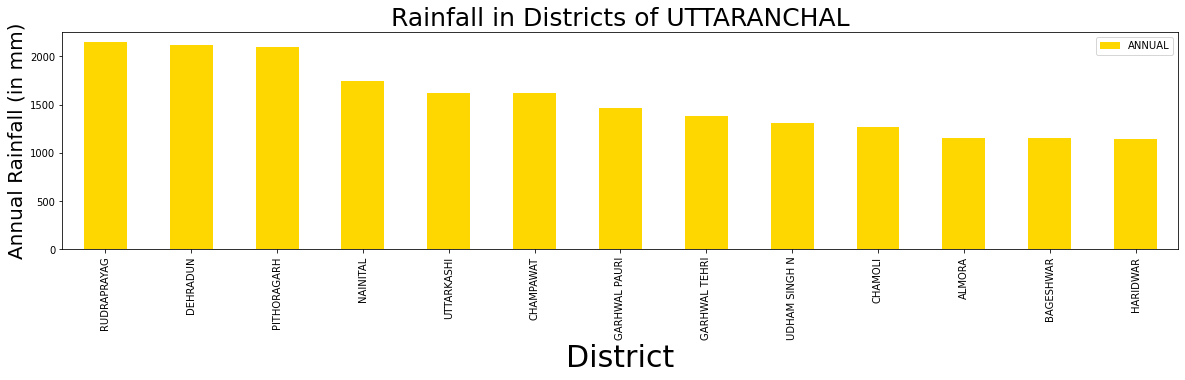

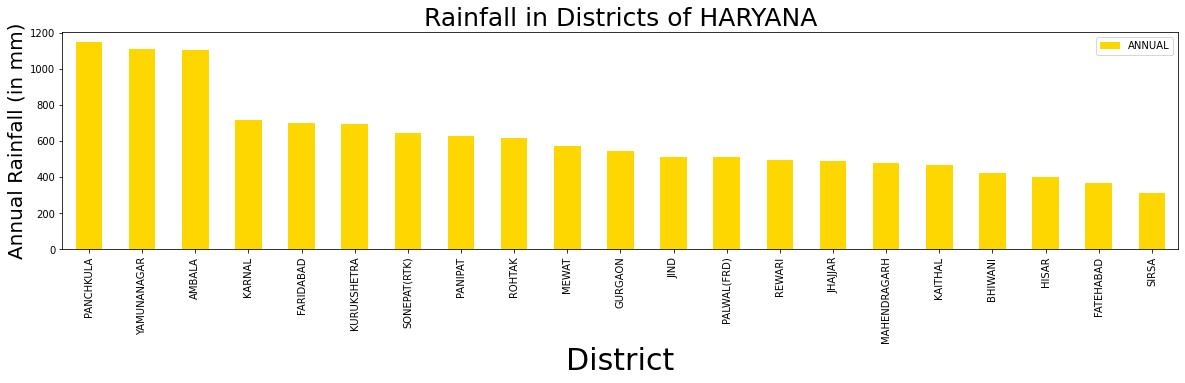

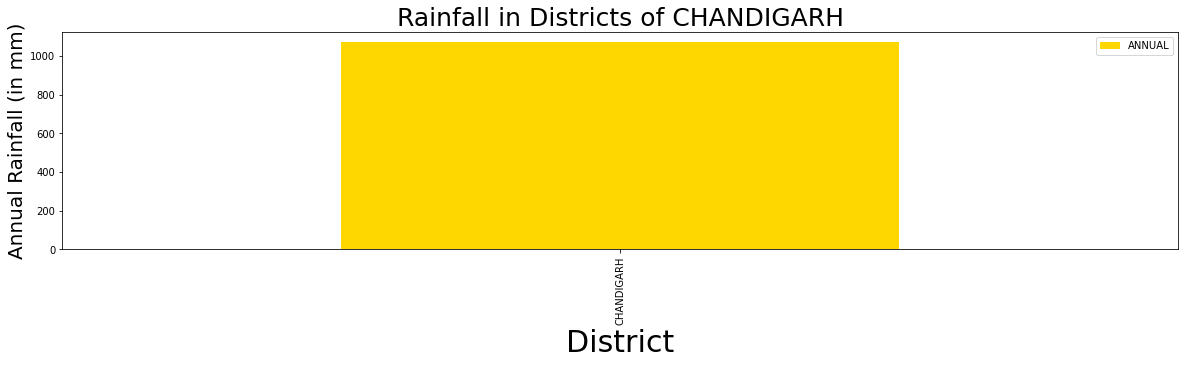

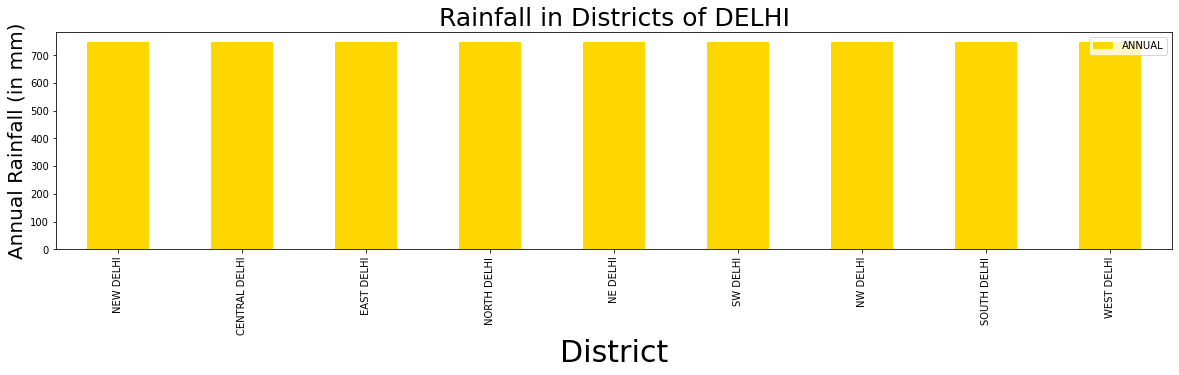

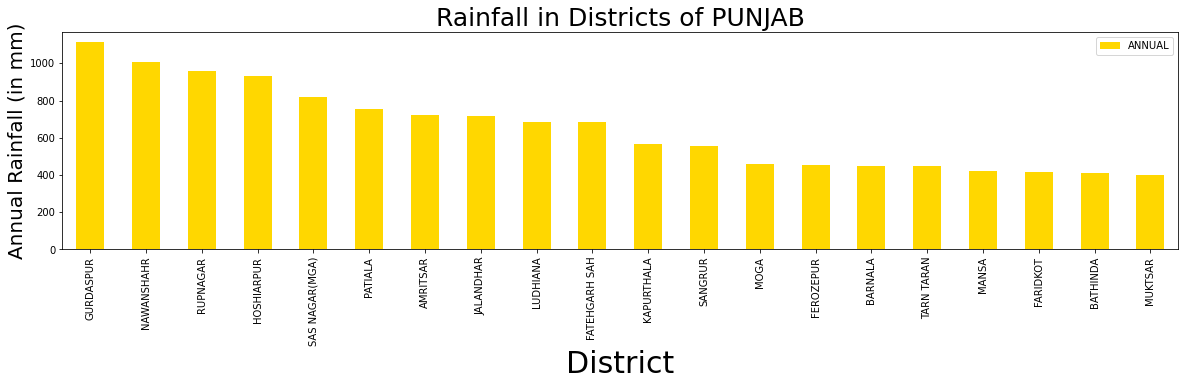

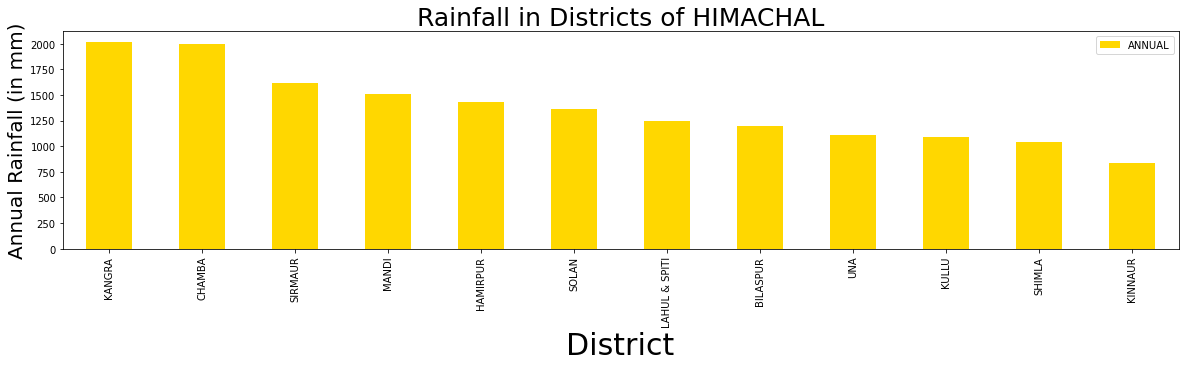

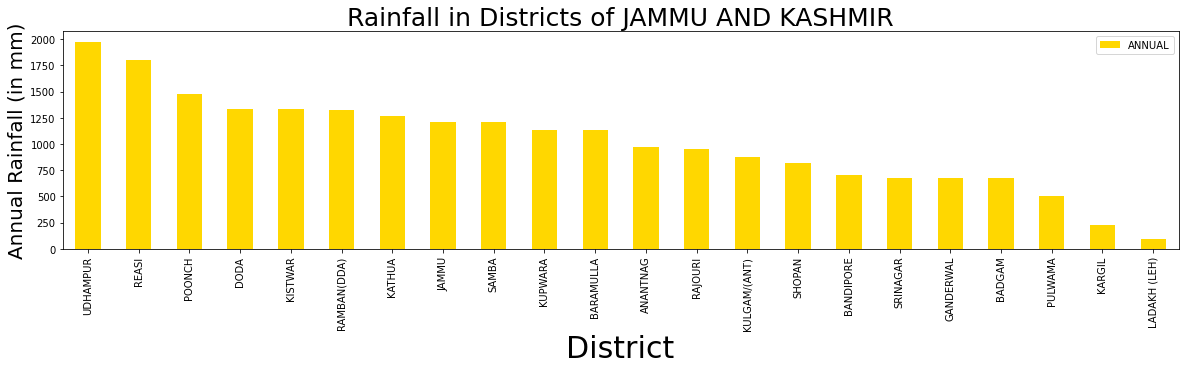

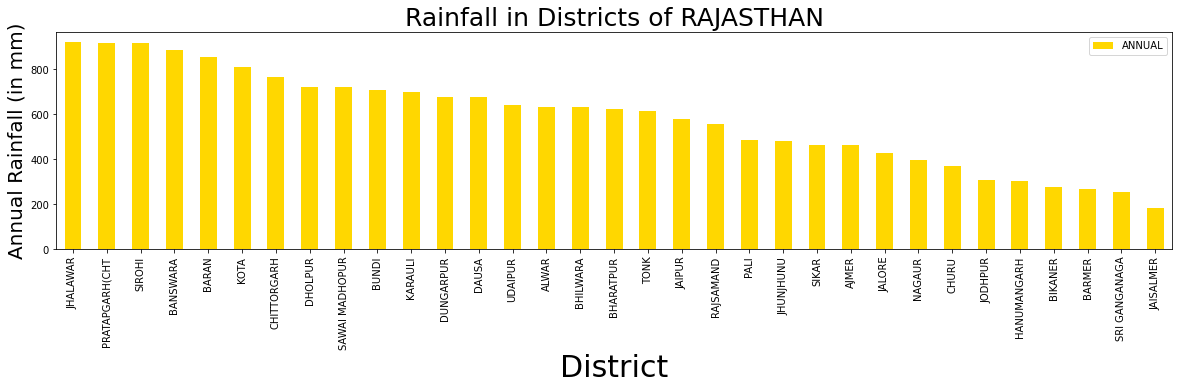

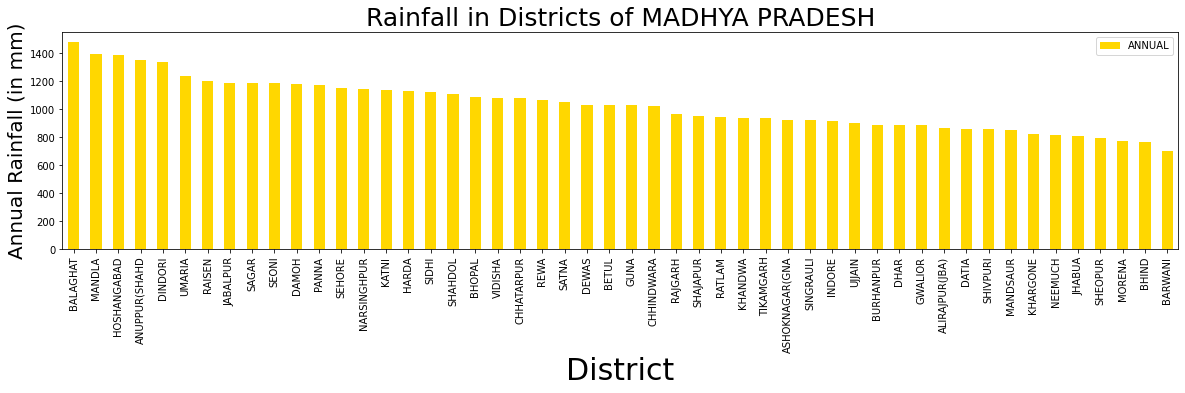

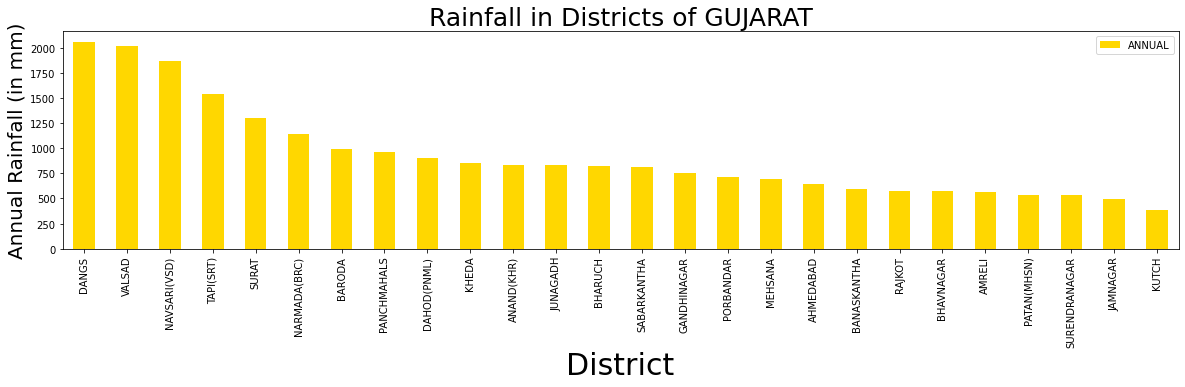

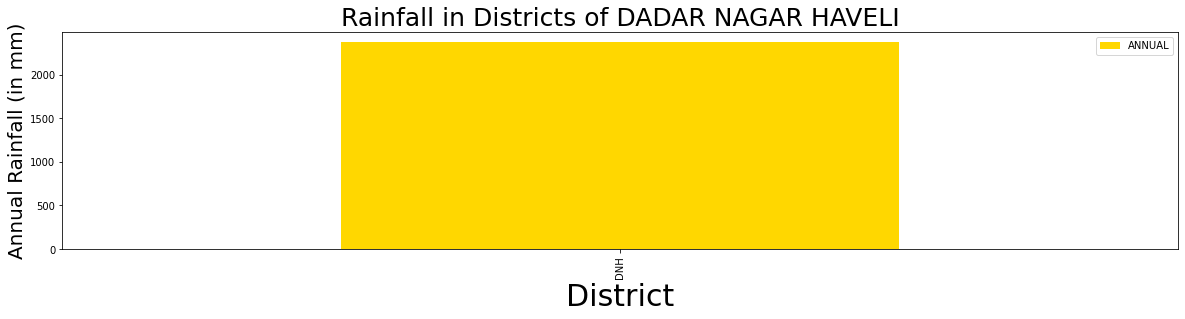

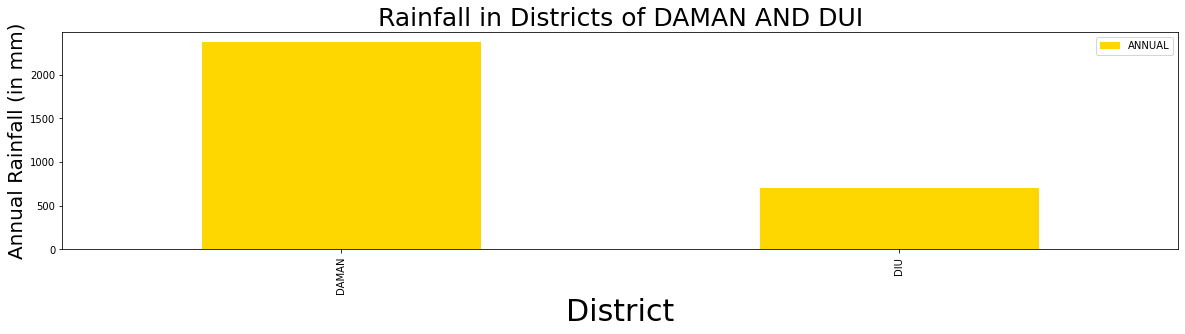

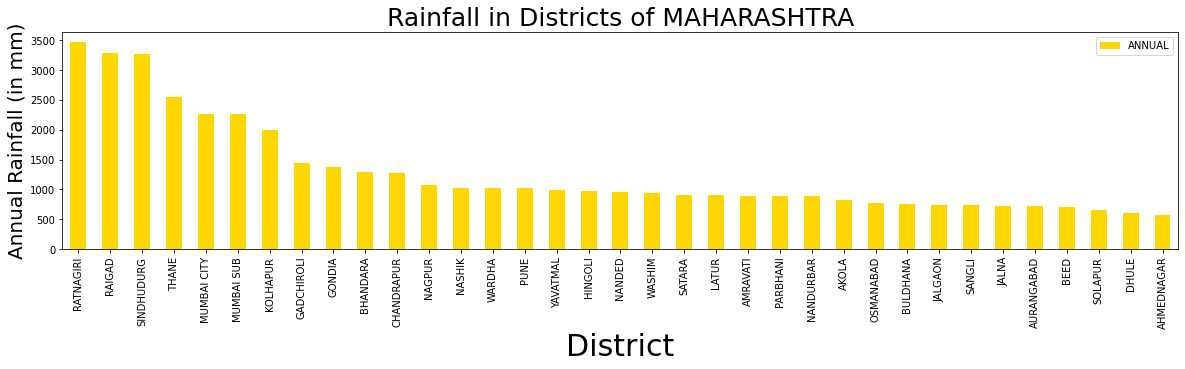

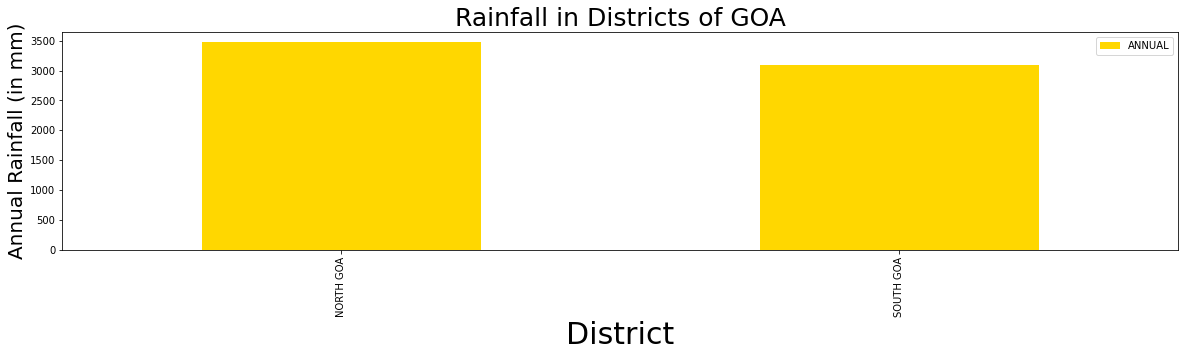

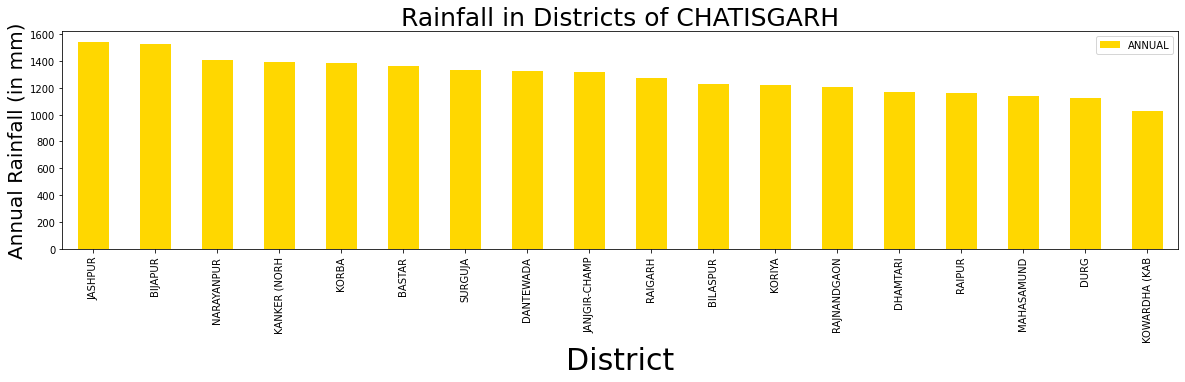

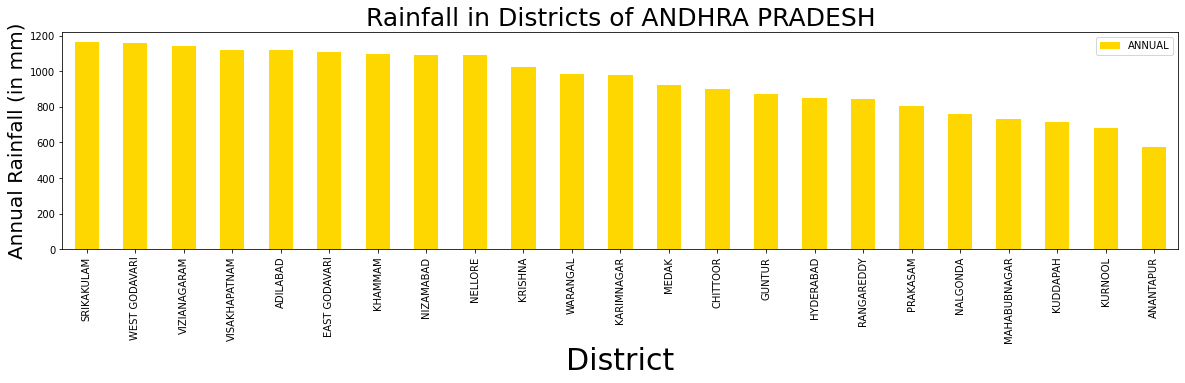

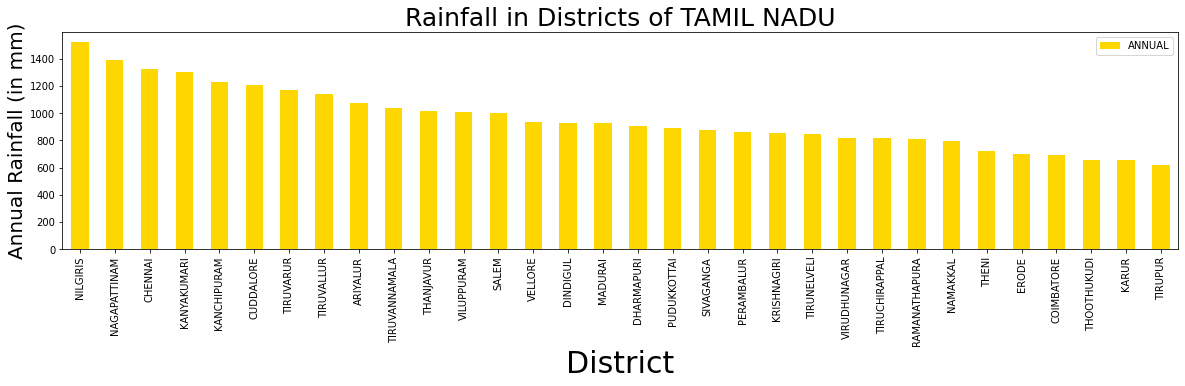

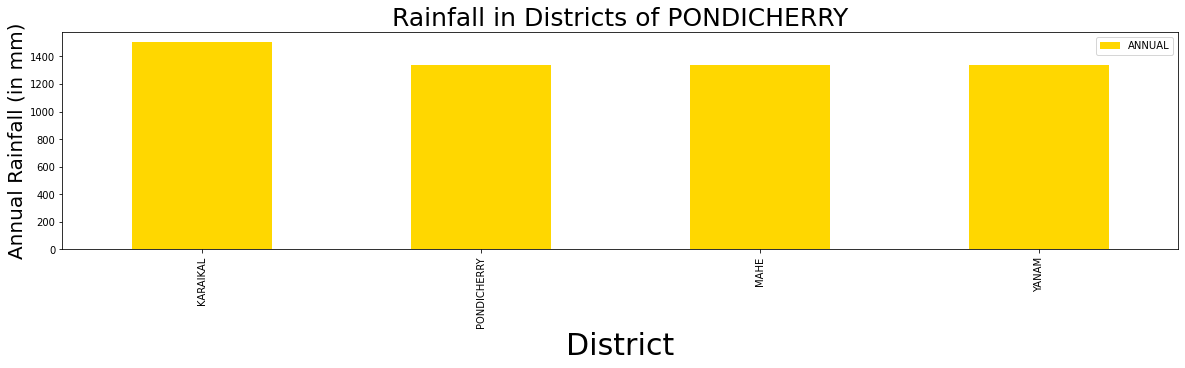

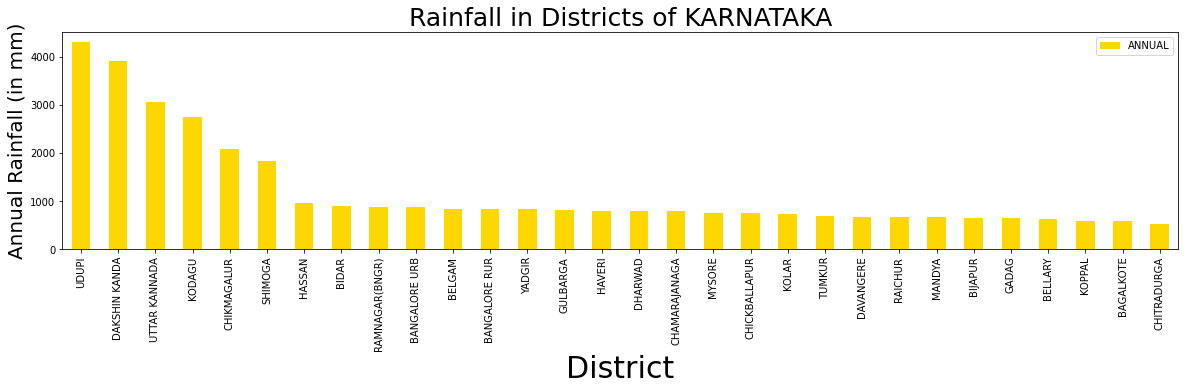

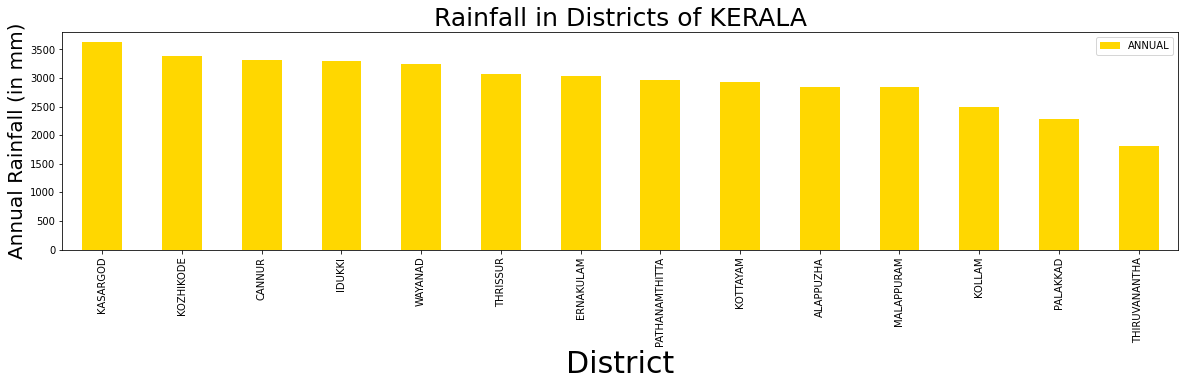

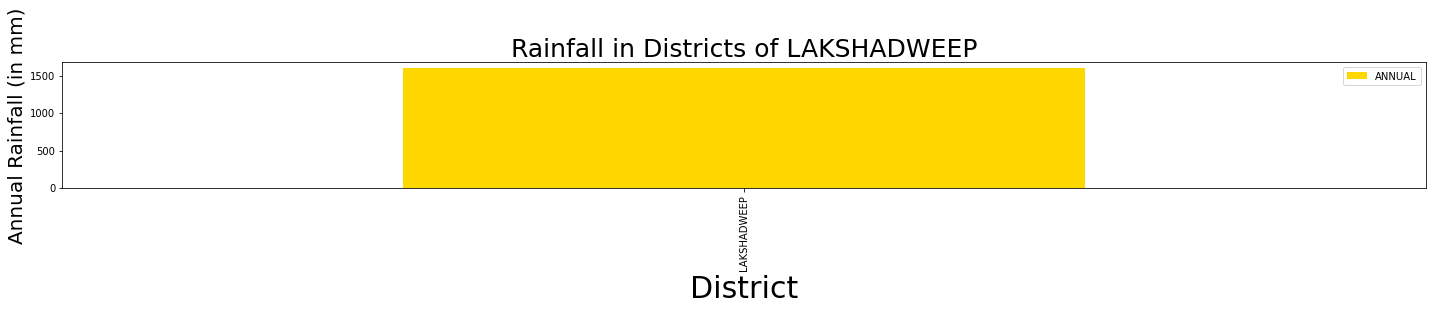

In [ ]:
for state in states:
  st=district[district['STATE_UT_NAME']==state][['DISTRICT','ANNUAL']]
  st.sort_values(by='ANNUAL',ascending=False,inplace=True)
  st.index=st['DISTRICT']
  st.plot.bar(width=0.5,color='gold',figsize=(20,4))
  plt.xlabel('District',fontsize=30)
  plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
  plt.title('Rainfall in Districts of {}'.format(state),fontsize=25)
plt.tight_layout()

In [ ]:
#!apt-get install -q libgeos-3.5.0
#!apt-get install -q libgeos-dev
#!pip install -q https://github.com/matplotlib/basemap/archive/master.zip

In [ ]:
#!pip install -q pyproj==1.9.6

In [ ]:
from mpl_toolkits.basemap import Basemap

Text(0.5, 1.0, 'Places with Heavy and Scanty Rainfall in India')

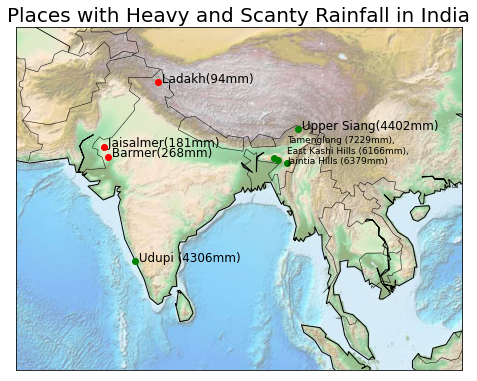

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='mill',llcrnrlat=0,urcrnrlat=40,
            llcrnrlon=60,urcrnrlon=115,resolution='c',satellite_height=35786000)
m.etopo(alpha=0.5)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
#x, y = m(8.52, 76.93)
#plt.plot(x, y, 'go', markersize=5)
#plt.text(x, y, ' Trivandrum', fontsize=12);
lat,lon=13.340881,74.742142
x,y=m(lon,lat)
m.plot(x,y,'go')
plt.text(x, y, ' Udupi (4306mm)', fontsize=12);
lat,lon=28.879720,94.796970
x,y=m(lon,lat)
m.plot(x,y,'go')
plt.text(x, y, ' Upper Siang(4402mm)', fontsize=12);
lat,lon=25.578773,91.893257
x,y=m(lon,lat)
m.plot(x,y,'go')
lat,lon=25.389820,92.394913
x,y=m(lon,lat)
m.plot(x,y,'go')
lat,lon=24.987934,93.495293
x,y=m(lon,lat)
m.plot(x,y,'go')
plt.text(x, y, 'Tamenglong (7229mm),\nEast Kashi Hills (6166mm),\nJaintia Hills (6379mm)', fontsize=9);
lat,lon=34.136389,77.604139
x,y=m(lon,lat)
m.plot(x,y,'ro')
plt.text(x, y, ' Ladakh(94mm)', fontsize=12);
lat,lon=25.759859,71.382439
x,y=m(lon,lat)
m.plot(x,y,'ro')
plt.text(x, y, ' Barmer(268mm)', fontsize=12);
lat,lon=26.915749,70.908340
x,y=m(lon,lat)
m.plot(x,y,'ro')
plt.text(x, y, ' Jaisalmer(181mm)', fontsize=12);
plt.title('Places with Heavy and Scanty Rainfall in India',fontsize=20)